In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread
from math import sqrt

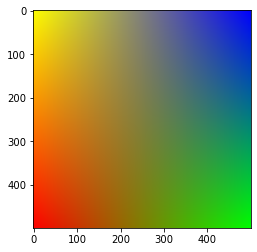

In [22]:
def generate_gradient_image(width, height, colors):
    # Create an empty image
    gradient_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Define corner colors
    top_left_color = colors[0]
    top_right_color = colors[1]
    bottom_right_color = colors[2]
    bottom_left_color = colors[3]

    # Generate gradient image
    for y in range(height):
        for x in range(width):
            # Interpolate colors based on position
            color_top = [int((bottom_left_color[0] * (width - x) * (height - y) + bottom_right_color[0] * x * (height - y) + top_left_color[0] * (width - x) * y + top_right_color[0] * x * y) / (width * height)),
                         int((bottom_left_color[1] * (width - x) * (height - y) + bottom_right_color[1] * x * (height - y) + top_left_color[1] * (width - x) * y + top_right_color[1] * x * y) / (width * height)),
                         int((bottom_left_color[2] * (width - x) * (height - y) + bottom_right_color[2] * x * (height - y) + top_left_color[2] * (width - x) * y + top_right_color[2] * x * y) / (width * height))]
            gradient_image[y, x] = color_top

    return gradient_image

# Define image size
width, height = 500, 500

# Define colors for each corner
top_left_color = (255, 0, 0)        # Red
top_right_color = (0, 255, 0)       # Green
bottom_right_color = (0, 0, 255)    # Blue
bottom_left_color = (255, 255, 0)   # Yellow

# Generate gradient image
gradient_image = generate_gradient_image(width, height, [top_left_color, top_right_color, bottom_right_color, bottom_left_color])

# Display the generated image
plt.imshow( gradient_image)

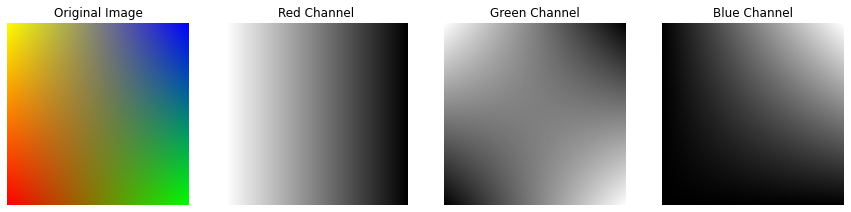

In [28]:
def generate_gradient_image(width, height, colors):
    gradient_image = np.zeros((height, width, 3), dtype=np.uint8)

    top_left_color = colors[0]
    top_right_color = colors[1]
    bottom_right_color = colors[2]
    bottom_left_color = colors[3]

    for y in range(height):
        for x in range(width):
            color_top = [int((bottom_left_color[0] * (width - x) * (height - y) + bottom_right_color[0] * x * (height - y) + top_left_color[0] * (width - x) * y + top_right_color[0] * x * y) / (width * height)),
                         int((bottom_left_color[1] * (width - x) * (height - y) + bottom_right_color[1] * x * (height - y) + top_left_color[1] * (width - x) * y + top_right_color[1] * x * y) / (width * height)),
                         int((bottom_left_color[2] * (width - x) * (height - y) + bottom_right_color[2] * x * (height - y) + top_left_color[2] * (width - x) * y + top_right_color[2] * x * y) / (width * height))]
            gradient_image[y, x] = color_top

    return gradient_image

# Generate gradient image
width, height = 500, 500
top_left_color = (255, 0, 0)        # Red
top_right_color = (0, 255, 0)       # Green
bottom_right_color = (0, 0, 255)    # Blue
bottom_left_color = (255, 255, 0)   # Yellow
gradient_image = generate_gradient_image(width, height, [top_left_color, top_right_color, bottom_right_color, bottom_left_color])

# Separate channels
red_channel = gradient_image[:, :, 0]
green_channel = gradient_image[:, :, 1]
blue_channel = gradient_image[:, :, 2]



# Plot the images using matplotlib
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
titles = ['Original Image', 'Red Channel', 'Green Channel', 'Blue Channel']
images = [gradient_image, red_channel, green_channel, blue_channel]

for ax, title, image in zip(axes, titles, images):
    ax.imshow(image, cmap='gray' if title != 'Original Image' else None)
    ax.set_title(title)
    ax.axis('off')

plt.show()

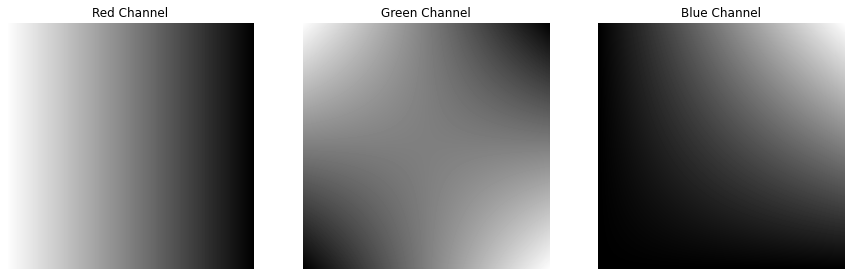

In [24]:

# Separate channels
red_channel = gradient_image[:, :, 0]
green_channel = gradient_image[:, :, 1]
blue_channel = gradient_image[:, :, 2]

# Plot the images using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Red Channel', 'Green Channel', 'Blue Channel']
images = [red_channel, green_channel, blue_channel]

for ax, title, image in zip(axes, titles, images):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()

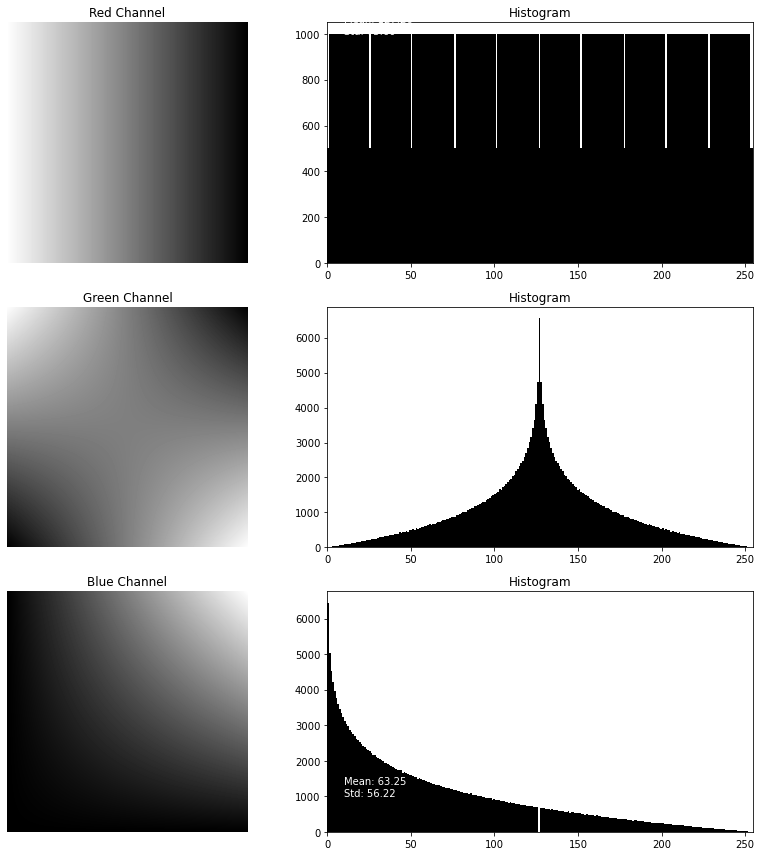

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

channels = [(red_channel, 'Red Channel'), (green_channel, 'Green Channel'), (blue_channel, 'Blue Channel')]

for i, (channel, title) in enumerate(channels):
    # Plot the image
    axes[i, 0].imshow(channel, cmap='gray')
    axes[i, 0].set_title(title)
    axes[i, 0].axis('off')

    # Plot the histogram
    axes[i, 1].hist(channel.ravel(), bins=256, color='black')
    axes[i, 1].set_title('Histogram')
    axes[i, 1].set_xlim([0, 255])

    # Calculate mean and standard deviation
    mean_value = np.mean(channel)
    std_value = np.std(channel)
    axes[i, 1].text(10, 1000, f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}', color='white')

plt.tight_layout()
plt.show()

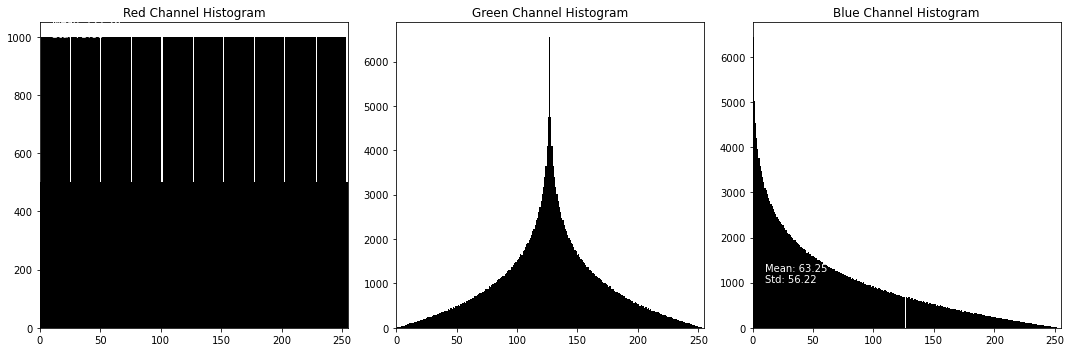

In [30]:
# Plot the histograms using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

channels = [(red_channel, 'Red Channel'), (green_channel, 'Green Channel'), (blue_channel, 'Blue Channel')]

for i, (channel, title) in enumerate(channels):
    # Plot the histogram
    axes[i].hist(channel.ravel(), bins=256, color='black')
    axes[i].set_title(title + ' Histogram')
    axes[i].set_xlim([0, 255])

    # Calculate mean and standard deviation
    mean_value = np.mean(channel)
    std_value = np.std(channel)
    axes[i].text(10, 1000, f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}', color='white')

plt.tight_layout()
plt.show()

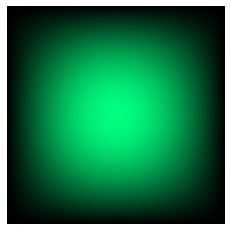

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_gradient_image(width, height, colors):
    gradient_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Define colors at each corner
    top_left_color = colors[0]
    top_right_color = colors[1]
    bottom_right_color = colors[2]
    bottom_left_color = colors[3]

    # Generate smooth gradients using sine function
    for y in range(height):
        for x in range(width):
            # Interpolate colors based on position
            color_top = [int((np.sin((np.pi * x) / width) * np.sin((np.pi * y) / height)) * (bottom_left_color[0] + top_right_color[0]) / 2),
                         int((np.sin((np.pi * x) / width) * np.sin((np.pi * y) / height)) * (bottom_left_color[1] + top_right_color[1]) / 2),
                         int((np.sin((np.pi * x) / width) * np.sin((np.pi * y) / height)) * (bottom_left_color[2] + top_right_color[2]) / 2)]
            gradient_image[y, x] = color_top

    return gradient_image

# Generate gradient image with multiple colors
width, height = 500, 500
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Red, Green, Blue, Yellow
gradient_image = generate_gradient_image(width, height, colors)

# Display the generated image
plt.imshow(cv2.cvtColor(gradient_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


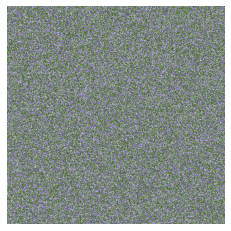

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_random_gradient_image(width, height, num_colors):
    gradient_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Generate random colors
    colors = [(np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256)) for _ in range(num_colors)]

    # Assign random colors to random positions in the image
    for y in range(height):
        for x in range(width):
            color_index = np.random.randint(0, num_colors)
            gradient_image[y, x] = colors[color_index]

    return gradient_image

# Generate gradient image with random colors
width, height = 500, 500
num_colors = 4
gradient_image = generate_random_gradient_image(width, height, num_colors)

# Display the generated image
plt.imshow(cv2.cvtColor(gradient_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


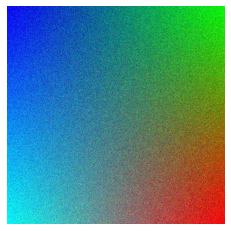

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gradient_image(width, height, colors):
    gradient_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Define colors at certain points
    color1 = colors[0]
    color2 = colors[1]
    color3 = colors[2]
    color4 = colors[3]

    # Generate smooth gradients for each color channel
    for y in range(height):
        for x in range(width):
            # Interpolate colors based on position
            r = int((color1[0] * (height - y) * (width - x) + color2[0] * (height - y) * x + color3[0] * y * x + color4[0] * y * (width - x)) / (width * height))
            g = int((color1[1] * (height - y) * (width - x) + color2[1] * (height - y) * x + color3[1] * y * x + color4[1] * y * (width - x)) / (width * height))
            b = int((color1[2] * (height - y) * (width - x) + color2[2] * (height - y) * x + color3[2] * y * x + color4[2] * y * (width - x)) / (width * height))

            # Add noise to create light and dark spots
            noise = np.random.randint(-50, 50, size=3)  # Adjusted noise range
            r += noise[0]
            g += noise[1]
            b += noise[2]

            # Ensure color values are within the valid range (0-255)
            r = max(0, min(255, r))
            g = max(0, min(255, g))
            b = max(0, min(255, b))

            gradient_image[y, x] = (b, g, r)  # Note: OpenCV uses BGR color format

    return gradient_image

# Generate gradient image with multiple colors
width, height = 500, 500
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Red, Green, Blue, Yellow
gradient_image = generate_gradient_image(width, height, colors)

# Display the generated image
plt.imshow(gradient_image)
plt.axis('off')
plt.show()


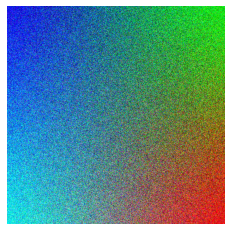

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gradient_image(width, height, colors):
    gradient_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Define colors at certain points
    color1 = colors[0]
    color2 = colors[1]
    color3 = colors[2]
    color4 = colors[3]

    # Generate smooth gradients for each color channel
    for y in range(height):
        for x in range(width):
            # Interpolate colors based on position
            r = int((color1[0] * (height - y) * (width - x) + color2[0] * (height - y) * x + color3[0] * y * x + color4[0] * y * (width - x)) / (width * height))
            g = int((color1[1] * (height - y) * (width - x) + color2[1] * (height - y) * x + color3[1] * y * x + color4[1] * y * (width - x)) / (width * height))
            b = int((color1[2] * (height - y) * (width - x) + color2[2] * (height - y) * x + color3[2] * y * x + color4[2] * y * (width - x)) / (width * height))

            # Add noise to create light and dark spots
            noise = np.random.randint(-100, 100, size=3)  # Increased noise range
            r += noise[0]
            g += noise[1]
            b += noise[2]

            # Ensure color values are within the valid range (0-255)
            r = max(0, min(255, r))
            g = max(0, min(255, g))
            b = max(0, min(255, b))

            gradient_image[y, x] = (b, g, r)  # Note: OpenCV uses BGR color format

    return gradient_image

# Generate gradient image with multiple colors
width, height = 500, 500
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Red, Green, Blue, Yellow
gradient_image = generate_gradient_image(width, height, colors)

# Display the generated image
plt.imshow(gradient_image)
plt.axis('off')
plt.show()


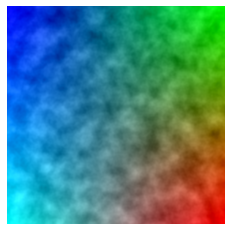

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import noise

def generate_gradient_image(width, height, colors):
    gradient_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Define colors at certain points
    color1 = colors[0]
    color2 = colors[1]
    color3 = colors[2]
    color4 = colors[3]

    # Generate smooth gradients for each color channel
    for y in range(height):
        for x in range(width):
            # Interpolate colors based on position
            r = int((color1[0] * (height - y) * (width - x) + color2[0] * (height - y) * x + color3[0] * y * x + color4[0] * y * (width - x)) / (width * height))
            g = int((color1[1] * (height - y) * (width - x) + color2[1] * (height - y) * x + color3[1] * y * x + color4[1] * y * (width - x)) / (width * height))
            b = int((color1[2] * (height - y) * (width - x) + color2[2] * (height - y) * x + color3[2] * y * x + color4[2] * y * (width - x)) / (width * height))

            # Add Perlin noise to create long strands and lines
            noise_val = noise.pnoise2(x / 50, y / 50, octaves=4, persistence=0.5, lacunarity=2.0, repeatx=width, repeaty=height, base=0)
            noise_val = int(noise_val * 100)  # Increased noise scaling

            r += noise_val
            g += noise_val
            b += noise_val

            # Ensure color values are within the valid range (0-255)
            r = max(0, min(255, r))
            g = max(0, min(255, g))
            b = max(0, min(255, b))

            gradient_image[y, x] = (b, g, r)  # Note: OpenCV uses BGR color format

    return gradient_image

# Generate gradient image with multiple colors
width, height = 500, 500
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Red, Green, Blue, Yellow
gradient_image = generate_gradient_image(width, height, colors)

# Display the generated image
plt.imshow(gradient_image)
plt.axis('off')
plt.show()


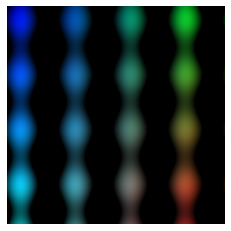

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gradient_image(width, height, colors):
    gradient_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Define colors at certain points
    color1 = colors[0]
    color2 = colors[1]
    color3 = colors[2]
    color4 = colors[3]

    # Generate smooth gradients for each color channel
    for y in range(height):
        for x in range(width):
            # Interpolate colors based on position
            r = int((color1[0] * (height - y) * (width - x) + color2[0] * (height - y) * x + color3[0] * y * x + color4[0] * y * (width - x)) / (width * height))
            g = int((color1[1] * (height - y) * (width - x) + color2[1] * (height - y) * x + color3[1] * y * x + color4[1] * y * (width - x)) / (width * height))
            b = int((color1[2] * (height - y) * (width - x) + color2[2] * (height - y) * x + color3[2] * y * x + color4[2] * y * (width - x)) / (width * height))

            # Add lines to simulate cloth strands
            line_intensity = 0.7 * np.sin(x / 20) + 0.3 * np.sin(y / 20)
            r = int(r * line_intensity)
            g = int(g * line_intensity)
            b = int(b * line_intensity)

            # Ensure color values are within the valid range (0-255)
            r = max(0, min(255, r))
            g = max(0, min(255, g))
            b = max(0, min(255, b))

            gradient_image[y, x] = (b, g, r)  # Note: OpenCV uses BGR color format

    return gradient_image

# Generate gradient image with multiple colors
width, height = 500, 500
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Red, Green, Blue, Yellow
gradient_image = generate_gradient_image(width, height, colors)

# Display the generated image
plt.imshow(gradient_image)
plt.axis('off')
plt.show()


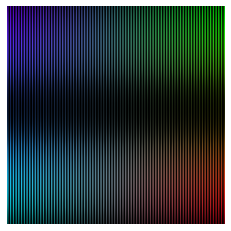

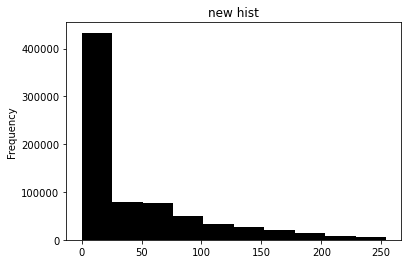

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def generate_gradient_image(width, height, colors):
    gradient_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Define colors at certain points
    color1 = colors[0]
    color2 = colors[1]
    color3 = colors[2]
    color4 = colors[3]

    # Generate smooth gradients for each color channel
    for y in range(height):
        for x in range(width):
            # Interpolate colors based on position
            r = int((color1[0] * (height) * (width - x) + color2[0] * (height - y) * x + color3[0] * y * x + color4[0] * y * ( x)) / (width * height))
            g = int((color1[1] * (height - y) * (width - x) + color2[1] * (height - y) * x + color3[1] * y * x + color4[1] * y * (width - x)) / (width * height))
            b = int((color1[2] * (height - y) * (width - x) + color2[2] * (height - y) * x + color3[2] * y * x + color4[2] * y * (width - x)) / (width * height))

            # Add lines to simulate cloth strands
            line_intensity =  np.sin(x ) + 0.5 * np.sin(y / 50)
            line_intensity = np.clip(line_intensity, 0, 1)  # Ensure intensity is within valid range

            r = int(r * line_intensity)
            g = int(g * line_intensity)
            b = int(b * line_intensity)

            # Ensure color values are within the valid range (0-255)
            r = max(0, min(255, r))
            g = max(0, min(255, g))
            b = max(0, min(255, b))

            gradient_image[y, x] = (b, g, r)  # Note: OpenCV uses BGR color format

    return gradient_image

# Generate gradient image with multiple colors
width, height = 500, 500
colors = [(255, 0, 110), (0, 255, 0), (0, 0, 255), (25, 255, 0)]  # Red, Green, Blue, Yellow
gradient_image = generate_gradient_image(width, height, colors)

# Display the generated image
plt.imshow(gradient_image)
plt.axis('off')

plt.show()
pd.Series(gradient_image.flatten()).plot(kind='hist',bins=10,title="new hist",color='black')
plt.show()


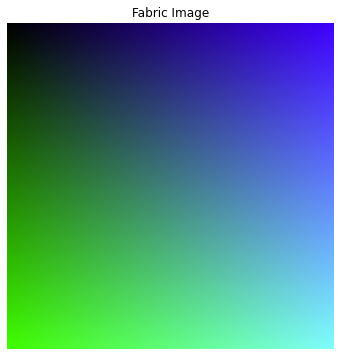

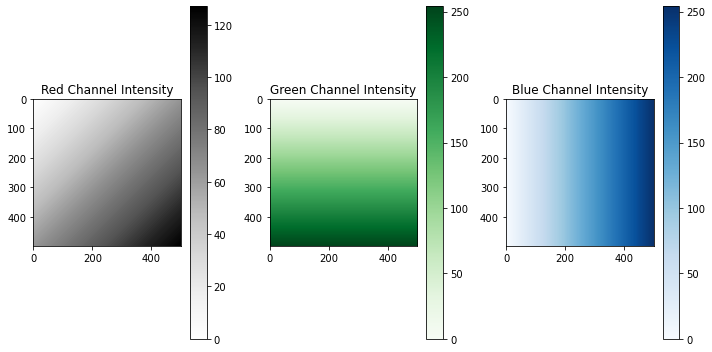

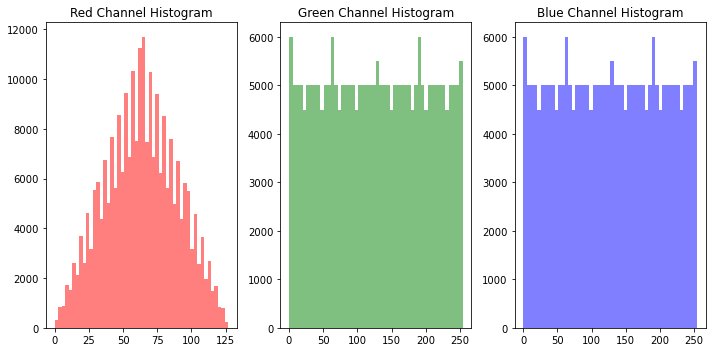

Mean of the whole image: 105.62533333333333
Standard deviation of the whole image: 68.78379536554294


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def generate_fabric_image(width, height):
    fabric_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Define color transitions
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Red, Green, Blue, Yellow

    # Generate smooth gradients for each color channel
    for y in range(height):
        for x in range(width):
            r = int(255 * x / width)  # Red component changes smoothly with x
            g = int(255 * y / height)  # Green component changes smoothly with y
            b = int(128 * (x + y) / (width + height))  # Blue component changes smoothly with both x and y

            fabric_image[y, x] = (b, g, r)  # Note: OpenCV uses BGR color format

    return fabric_image

# Generate fabric image
width, height = 500, 500
fabric_image = generate_fabric_image(width, height)

# Plot fabric image
plt.figure(figsize=(6, 6))
plt.imshow(fabric_image)
plt.axis('off')
plt.title('Fabric Image')
plt.show()

# Separate RGB channels
r_channel = fabric_image[:, :, 0]
g_channel = fabric_image[:, :, 1]
b_channel = fabric_image[:, :, 2]


# Plot intensity values of RGB channels on different subplots in one figure
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(r_channel, cmap='Greys')
plt.title('Red Channel Intensity')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(g_channel, cmap='Greens')
plt.title('Green Channel Intensity')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(b_channel, cmap='Blues')
plt.title('Blue Channel Intensity')
plt.colorbar()

plt.tight_layout()
plt.show()

# Plot histograms of each color channel on three subplots in another figure
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(r_channel.flatten(), bins=50, color='red', alpha=0.5)
plt.title('Red Channel Histogram')

plt.subplot(1, 3, 2)
plt.hist(g_channel.flatten(), bins=50, color='green', alpha=0.5)
plt.title('Green Channel Histogram')

plt.subplot(1, 3, 3)
plt.hist(b_channel.flatten(), bins=50, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')

plt.tight_layout()
plt.show()

# Calculate mean and standard deviation of the whole image
mean_value = np.mean(fabric_image)
std_deviation = np.std(fabric_image)
print(f"Mean of the whole image: {mean_value}")
print(f"Standard deviation of the whole image: {std_deviation}")
